**Import libraries**

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Import Data**

In [3]:
my_filepath = 'train.csv'
df = pd.read_csv(my_filepath, index_col='PassengerId')

In [4]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

# Context

Используемый набор данных является сгенерированным синтетически и основывается на реальных данных о пассажирах Титаника со схожими статистическими свойствами.

«Тита́ник» (англ. Titanic) — британский трансатлантический пароход, второй лайнер класса «Олимпик» компании «White Star Line». Крупнейшее пассажирское судно в мировой истории в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года.

10 апреля 1912 года «Титаник» отправился из **Саутгемптона** (**S**outhampton) в Нью-Йорк, в свой первый и единственный рейс. Совершив остановки во французском **Шербуре** (**C**herbourg) и ирландском **Квинстауне** (**Q**ueenstown), лайнер вышел в Атлантический океан.

Каюты **первого** класса распологались на верхних палубах, **второго** класса - посередине, а **третьего** - на самых нижних палубах.

# Data quality assessment

### **1.** Let’s take a look at our dataset 

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [6]:
a, b = df.shape
print('Приведенная таблица имеет размер:', a, 'строк и', b, 'колонок, колонка PassengerId использована в качестве индекса')

Приведенная таблица имеет размер: 100000 строк и 11 колонок, колонка PassengerId использована в качестве индекса


### **2.** Проверим недостающие значения и типы наших данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


В данных имеются пропущенные начения

В таблице имеются следующие типы данных: float64(2), int64(4), object(5)

### **3.** Узнаем колличество пропущенных значений в данных.

In [8]:
df.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [9]:
print((df.isna().sum().sum() / 11000).round(3),'% - процентов всех данных пропущено')

6.924 % - процентов всех данных пропущено


<AxesSubplot:>

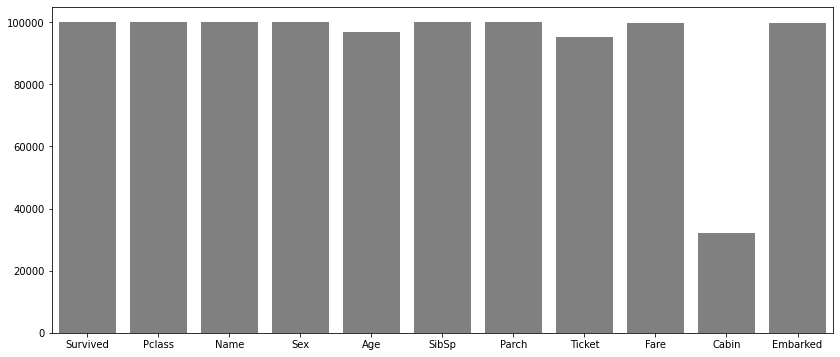

In [10]:
new_df = df
new_df = new_df.notnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(y=new_df.values, x=new_df.index, color='gray', )

Пропуски меются в стобцах Age, Ticket, Fare, Cabin, Embarked. Данных из столбца **Cabin** имеется только треть

### **4.** Проверка на дубликаты

In [11]:
df.duplicated().sum()

0

### **5.** Проверка соответсвия колонок нужным типам.

In [12]:
df['Ticket'].value_counts().head(10)

A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
W./C.           53
A/5.            40
W.E.P.          23
CA              22
STON/O2.        21
Name: Ticket, dtype: int64

In [13]:
df[df['Name'].str.match(r'(\d+)')==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [14]:
df.groupby('Embarked').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,
C,22187,22187,22187,22187,21456,22187,22187,21949,22154,12979
Q,5424,5424,5424,5424,5237,5424,5424,5369,5416,4022
S,72139,72139,72139,72139,69767,72139,72139,67818,72047,15045


In [15]:
df.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,43886,43886,43886,42501,43886,43886,41246,43827,18156,43755
male,56114,56114,56114,54207,56114,56114,54131,56039,13978,55995


In [16]:
df.groupby('Pclass').count()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,30315,30315,30315,29353,30315,30315,30288,30275,26463,30229
2,28679,28679,28679,27731,28679,28679,27855,28637,3520,28609
3,41006,41006,41006,39624,41006,41006,37234,40954,2151,40912


Данных в колонке **Cabin** присутствует лишь треть. Категориальные признаки Survived, Pclass, Sex, Embarked представленны без мусора, но с небольшими пропусками. Признак **Ticket** кроме нулевых значений имеет дубликаты, не соответствуюие классу признака - предпологается, что все билеты должны быть уникальны.

### 6. Проверка на выбросы

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


<AxesSubplot:>

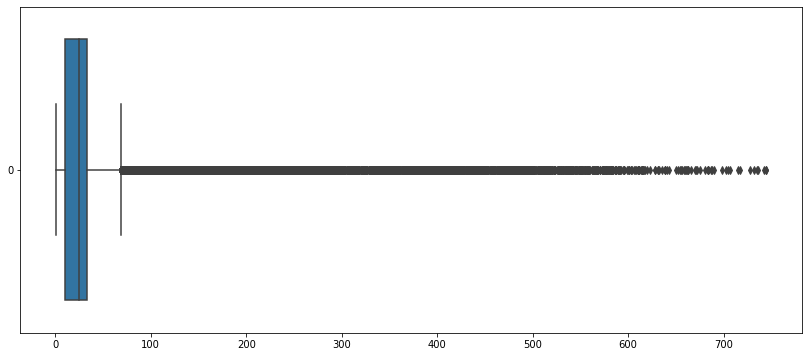

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(orient='h', data=df.Fare)

Значения **Fare** возможно имеют выбросы, так как 75 процентиль для него равняется 33.5, а max значение - 744.66.
Однако, это можно связать с тем, что цена может быть связана с благосостоянием человека, а следовательно и более дорогие каюты могло себе позволить меньшенство.

<AxesSubplot:>

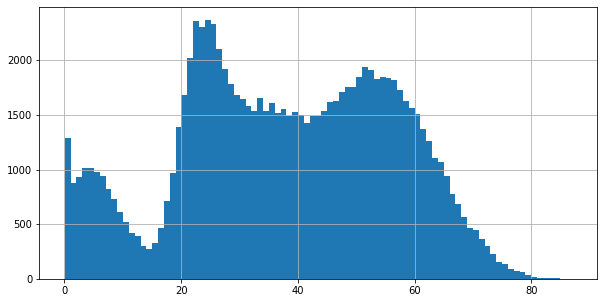

In [19]:
df.Age.hist(bins=87, figsize=(10, 5))

# Data exploration

### 1. Exploration of each individual variable

In [20]:
for col in df.columns:
    print(f'Column name: {col}','\n', df[f'{col}'].describe(), '\n\nUnique values:', df[f'{col}'].unique(), '\n\n')

Column name: Survived 
 count    100000.000000
mean          0.427740
std           0.494753
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Survived, dtype: float64 

Unique values: [1 0] 


Column name: Pclass 
 count    100000.000000
mean          2.106910
std           0.837727
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Pclass, dtype: float64 

Unique values: [1 3 2] 


Column name: Name 
 count            100000
unique            92144
top       Johnson, John
freq                 31
Name: Name, dtype: object 

Unique values: ['Oconnor, Frankie' 'Bryan, Drew' 'Owens, Kenneth' ...
 'Childress, Charles' 'Caughlin, Thomas' 'Enciso, Tyler'] 


Column name: Sex 
 count     100000
unique         2
top         male
freq       56114
Name: Sex, dtype: object 

Unique values: ['male' 'female'] 


Column name: Age 
 count    96708.000000
mean  

Посмотрим на распределение каждого признака

In [21]:
df2 = df

In [22]:
d_sex = {'male': 0, 'female': 1}
d_embar = {'S': 0, 'C' : 1, 'Q' : 2}

df2['Sex'] = df['Sex'].map(d_sex)
df2['Embarked'] = df['Embarked'].map(d_embar)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

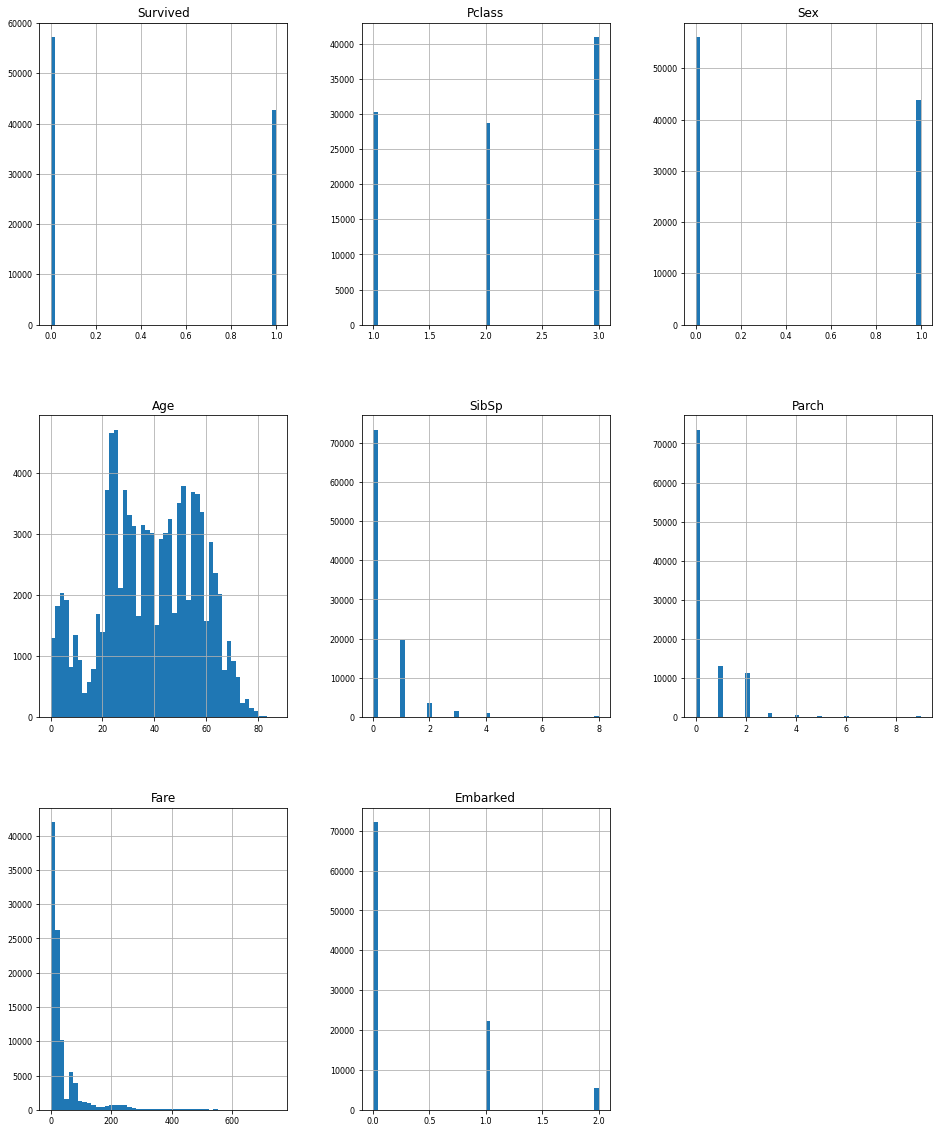

In [25]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Выводы
- больше пассажиров погибло чем спаслось
- подавляющее большинство пассажиров находилось в каютах третьего класса
- мужчин было больше чем женщин

### 2. Assessment of the relationship between each variable and the target variable

#### Relationship between Survived and Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

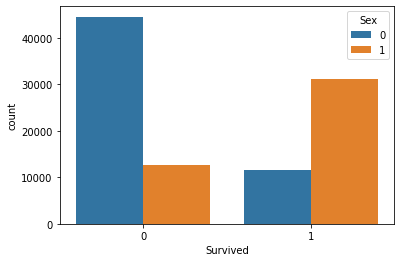

In [172]:
sns.countplot(x='Survived', hue='Sex', data=df)

#### Relationship between Survived and Age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

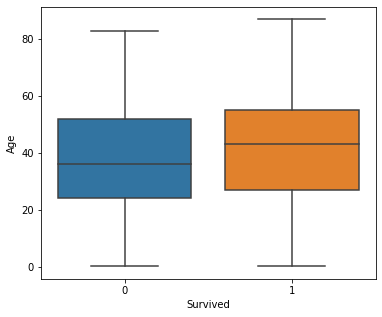

In [173]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Survived', y='Age')

#### Разделим колонку Age на 3 категории: Child (0) - до 16 лет, Adult (1) - 16 <= Adult < 45, и Old (2) - старше 45, при этом заменим отсутствующие значения Age на среднне значение из той же группы по категориям Pclass и Sex

In [174]:
for sex in range(2):
    for pclass in range (1,4):
        df.loc[(df['Pclass'] == pclass) & (df.Sex == sex) & (df.Age.isnull()), 'Age'] = \
        df[(df['Pclass'] == pclass) & (df["Sex"] == sex)].Age.mean().round()     

In [175]:
df.Age.isna().any()

False

In [176]:
df['Age_group'] = df['Age']

<AxesSubplot:xlabel='Age_group', ylabel='count'>

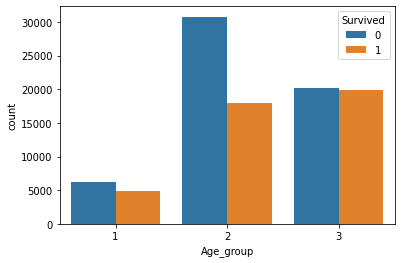

In [177]:
def age_group(x):
    if x < 16:
        return 1
    elif x < 45:
        return 2
    else: return 3
df['Age_group'] = df.Age_group.apply(lambda x: age_group(x))
sns.countplot(hue='Survived', x=df['Age_group'], data=df)

**Вывод:** Если ты взрослый, то выжить шансов практически в два раза меньше чем погибнуть. У детей или людей старшего поколения шансы на выживание почти 50 на 50.

#### Relationship between Survived and Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

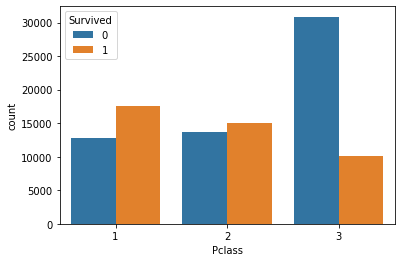

In [178]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

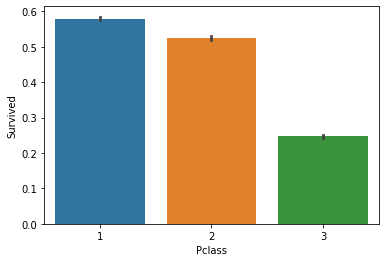

In [179]:
sns.barplot(x='Pclass', y='Survived', data=df)

**Вывод:** В третьем классе шанс выжить самый низкий

#### Relationship between Survived and SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

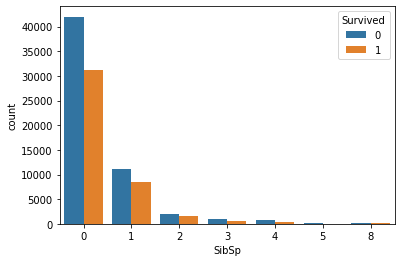

In [180]:
sns.countplot(x='SibSp', hue='Survived', data=df)

#### Relationship between Survived and Parch

<AxesSubplot:xlabel='Parch', ylabel='count'>

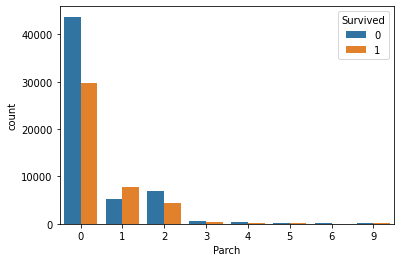

In [181]:
sns.countplot(x='Parch', hue='Survived', data=df)

Введем новый признак Family, являющийся суммой признаков Parch и SibSp

In [182]:
df2['Family'] = df2.Parch + df2.SibSp

<AxesSubplot:xlabel='Family', ylabel='count'>

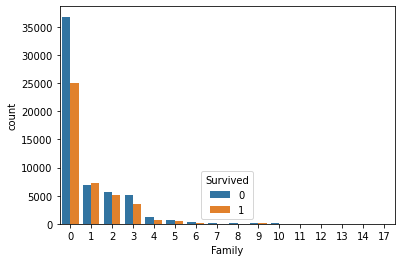

In [183]:
sns.countplot(x='Family', hue='Survived', data=df)

Видна небольшая зависимость выживаемости от наличия семьи - у людей без родственников отслеживается явно меньший процент выживаемости, чем у людей с семьей.

Разделим пассажиров по парамметру Family на две категории:

    0 - без семьи
    1 - с семьей

In [184]:
df.loc[df['Family'] != 0, 'Family'] = 1
df.loc[df['Family'] == 0, 'Family'] = 0

<AxesSubplot:xlabel='Family', ylabel='count'>

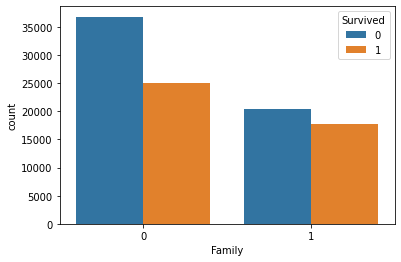

In [185]:
sns.countplot(x='Family', hue='Survived', data=df)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

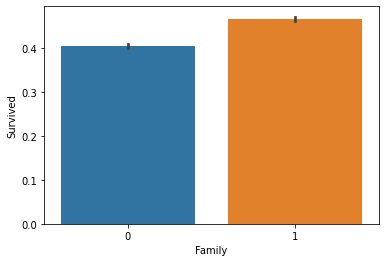

In [186]:
sns.barplot(x='Family', y='Survived', data=df)

Присутствие родственников в целом дает небольшой шанс выживаемости, но, если посмотреть на связь в разрезе по классам и полу, то картина меняется.

c:\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


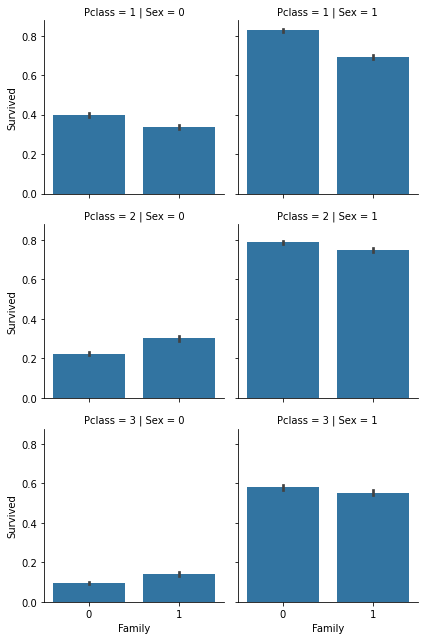

In [187]:
g = sns.FacetGrid(data=df, row='Pclass', col='Sex')
g.map(sns.barplot, 'Family', 'Survived')

Отсутствие семьи у женщин во всех классах дает небольшую прибавку к выживаемости. У мужчин аналогично для первого класса, а для 2 и 3 - отсутствие семьи ведет к ухудшению выживаемости.

#### Relationship between Survived and Fare

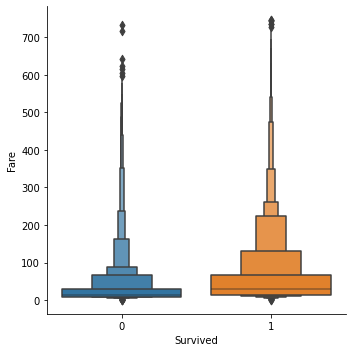

In [188]:
sns.catplot(kind="boxen", y='Fare', x='Survived', data=df)

Видно, что путешествующие за более низкую стоимость пассажиры выживале реже, чем за более высокую

#### Relationship between Survived and Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

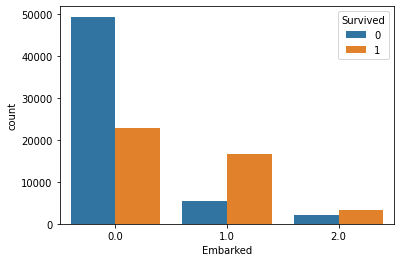

In [189]:
sns.countplot(x='Embarked', hue='Survived', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

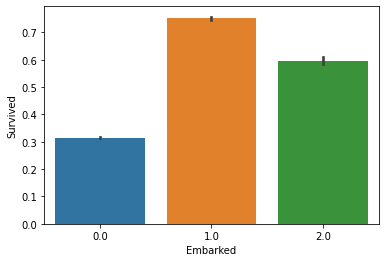

In [190]:
sns.barplot(x='Embarked', y='Survived', data=df)

Видна взаимосвязь между портом посадки - севшие в месте отправления - S - имели меньше шансов выжить, чем остальные.

#### Calculate correlation between Survived and all characteristics

In [191]:
df.corrwith(df.Survived)

Survived     1.000000
Pclass      -0.289723
Sex          0.507260
Age          0.104835
SibSp       -0.007587
Parch        0.023352
Fare         0.187534
Embarked     0.318042
Age_group    0.077684
Family       0.060086
dtype: float64

#### Рассмотрим влияние признака Cabin на выживаемость

Из-за слишком большого колличества пропусков, использовать информацию о палубе (буква перед номером каюты) не представляет возможности.

Однако, рассмотрим причину отсутсвия такого большого колличества данных. Номера кают первого класса стали известны из списка, который был найден на теле стюарта Herbert Cave, больше никакой официальной информации не сохранилось, соответственно, можно сделать вывод, что, если известен номер каюты пассажира второго или третьего класса, то он выжил. Поэтому, посмотрим на выживаемость в зависимости от наличия номера каюты в целом по всем пассажирам.

Для этого разделим колонку Cabin на два признака:
- Те, у кого есть номер каюты -   1
- У кого нет номера каюты -       0

In [192]:
df.loc[df.Cabin.isna(), 'Cabin'] = 0
df.loc[df.Cabin != 0, 'Cabin'] = 1

In [193]:
df = df.astype({"Cabin":'float'})

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

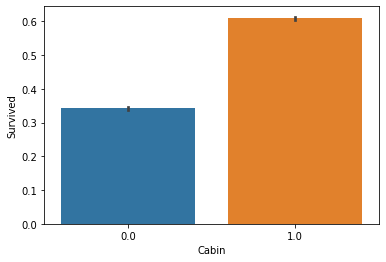

In [194]:
sns.barplot(x='Cabin', y='Survived', data=df)

c:\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


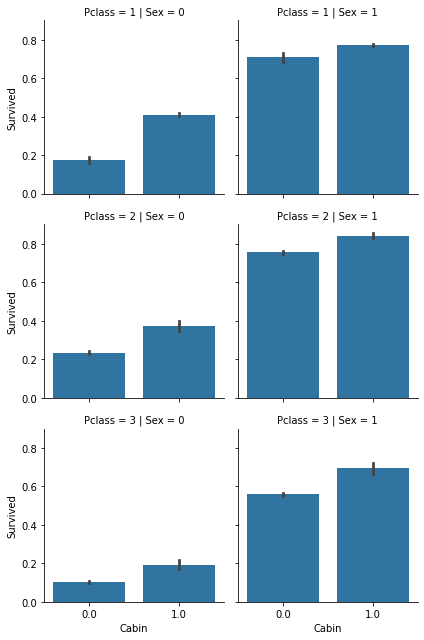

In [195]:
g = sns.FacetGrid(data=df, row='Pclass', col='Sex')
g.map(sns.barplot,'Cabin', 'Survived')

Очевидно, что предположение подтвердилось, в особенности для пассажиров мужского пола.

### 3. Assessing interactions between variables

Проверим, имеются ли в признаке Name какие либо данные о принадлежности пасажира к какой-либо категории, например титул.

In [196]:
lst = []
for name in df.Name:
    if len(name.split(', ')) > 2:
        lst.append(name.split(', '))
lst

[]

Имена не нусут в себе никакой полезной информации, удалим данную колонку

In [197]:
df = df.drop('Name', axis=1)

#### Заполним небольшое кол-во пропущеных значений в Fare и Embarked медианой

In [198]:
df.loc[df.Fare.isna(), 'Fare'] = df[df.Fare.notna()].median().Fare

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_2976/248517509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[df.Fare.isna(), 'Fare'] = df[df.Fare.notna()].median().Fare


In [199]:
df.loc[df.Embarked.isna(), 'Embarked'] = df[df.Embarked.notna()].Embarked.median()

In [200]:
df2 = df.reset_index().loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Age_group', 'Family']]

In [201]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Survived   100000 non-null  int64  
 1   Pclass     100000 non-null  int64  
 2   Sex        100000 non-null  int64  
 3   Age        100000 non-null  float64
 4   SibSp      100000 non-null  int64  
 5   Parch      100000 non-null  int64  
 6   Fare       100000 non-null  float64
 7   Cabin      100000 non-null  float64
 8   Embarked   100000 non-null  float64
 9   Age_group  100000 non-null  int64  
 10  Family     100000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 8.4 MB


In [1]:
plt.figure(figsize=(12,10))

corr = df2.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, mask=mask, cmap=cmap)


NameError: name 'plt' is not defined

#### Рассмотрим влияние на выживаемость Возраста в зависимости от Класса каюты и Пола:

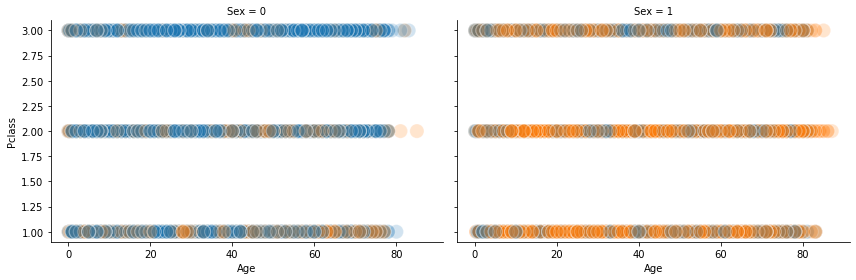

In [203]:
g = sns.FacetGrid(data=df, col='Sex', height=4, aspect=1.5)
g.map(sns.scatterplot, 'Age', 'Pclass', 'Survived', alpha=0.2, legend='full', size=200, sizes=(200, 200))

c:\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


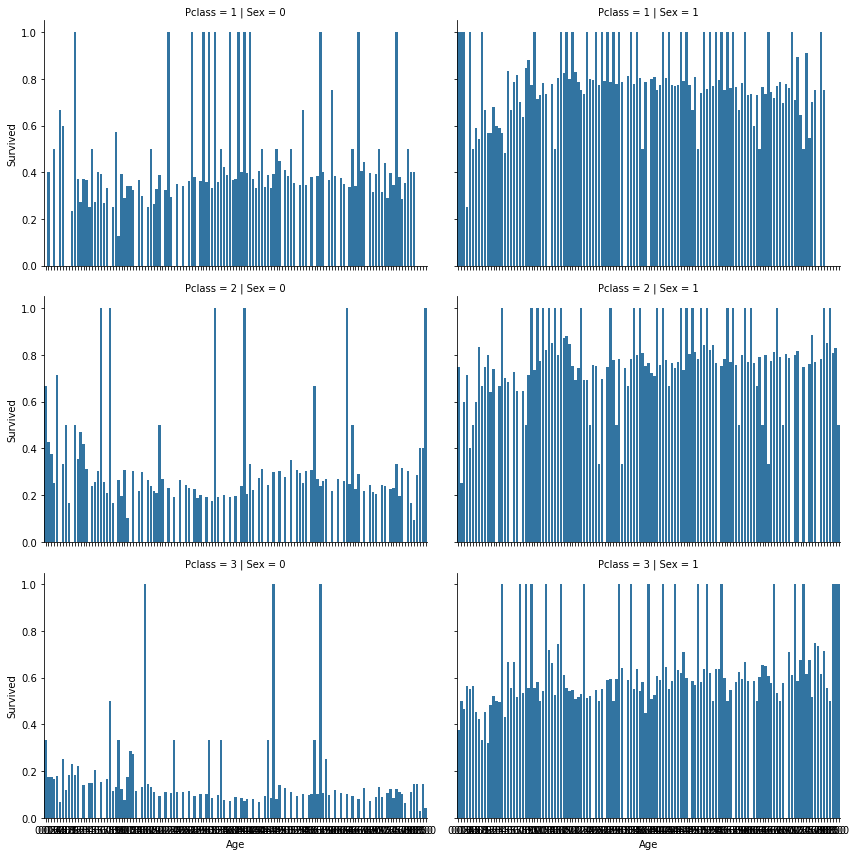

In [204]:
g = sns.FacetGrid(data=df, row='Pclass', col='Sex', height=4, aspect=1.5)
g.map(sns.barplot, 'Age', 'Survived', ci=None)

c:\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\python38\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


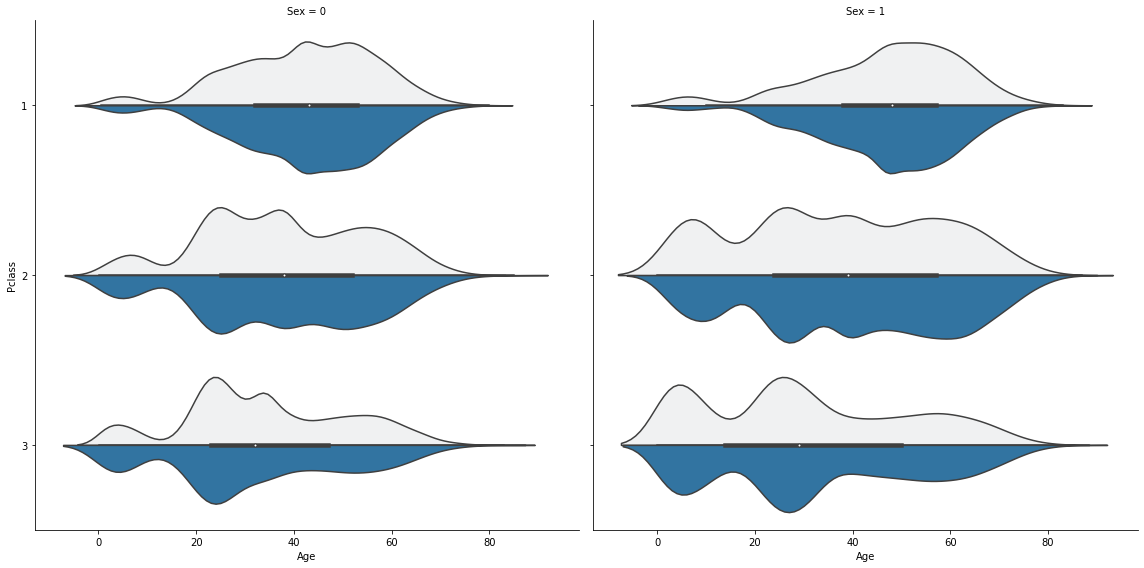

In [205]:
g = sns.FacetGrid(data=df, col='Sex', height=8, aspect=1)
g.map(sns.violinplot, 'Age', 'Pclass', 'Survived', orient='h', split=True)#alpha=0.2, legend='full', size=200, sizes=(200, 200)


Видно, что основные группы выживших — это женщины первого и второго класса всех возрастов. А среди мужчин большие шансы на выживание имела небольшая доля мужчин старшего возраста и в основном из первого класса.

# Summary

- Больше пассажиров погибло чем спаслось
- Подавляющее большинство пассажиров находилось в каютах третьего класса
- Мужчин было больше чем женщин
- У женщин выживаемость больше из-за приказа капитана спасать их в первую очередь.
- Чем выше класс каюты пассажира — тем больше шансы выжить.
- Если ты взрослый, то выжить шансов практически в два раза меньше чем погибнуть. У детей или людей старшего поколения шансы на выживание почти 50 на 50.
- В третьем классе шанс выжить самый низкий
- Видна небольшая зависимость выживаемости от наличия семьи - у людей без родствинников отслеживается явно меньший процент выживаемости, чем у людей с семьей.
- Присутствие родственников в целом дает небольшой шанс выживаемости, но, если посмотреть на связь в разрезе по классам и полу, то картина меняется.
- Отсутствие семьи у женщин во всех классах дает небольшую прибавку к выживаемости. У мужчин аналогично для первого класса, а для 2 и 3 - отсутствие семьи ведет к ухудшению выживаемости.
- Путешествующие за более низкую стоимость пассажиры выживале реже, чем за более высокую.
- Видна взаимосвязь между портом посадки - севшие в месте отправления - S - имели меньше шансов выжить, чем остальные. Но это скорее всего связано с распределением пассажиров разных классов между этими портами.
- Выживаемость зависит от наличия номера каюты - Cabin, т.к. номера кают первого класса стали известны из списка, который был найден на теле стюарта Herbert Cave, больше никакой официальной информации не сохранилось, соответственно, можно сделать вывод, что, если известен номер каюты пассажира второго или третьего класса, то он выжил.
- Наибольшее влияние на выживаемость присутствие номера каюты оказывает на мужчин, т.к. их выжило меньше всего.
- Основные группы выживших — это женщины первого и второго класса всех возрастов. А среди мужчин большие шансы на выживание имела небольшая доля мужчин старшего возраста и в основном из первого класса.